## List of Possible Dimensionality Techniques that I came across my study

### Let us start with the old ones.

#### Missing Value Ratio
* Data columns with too many missing values are unlikely to carry much useful information.We use this approach to reduce the number of variables. Data columns with a ratio of missing values greater than a given threshold can be removed. 

#### Random Forest
* Commonly used and also useful for column selection. They are effective classifiers as we can find the importance of each feature.

#### Low variance Filter
* To identify and drop constant variables from the dataset.
* Variance depends on the column range, normalization is required before applying this technique.

#### High Correlation Filter
* Data columns with similar trends are likely to carry similar information, and only one of them will suffice for classification.
* A pair of variables having high correlation increases multicollinearity.
* Same as above it depends on column range, so normalization is required.

#### Principal Component Analysis
* It divides the data into a set of components which try to explain as much variance as possible.
* Widely used techniques for dealing with linear data. 
* Applying PCA to your dataset loses its interpretability, PCA is not the transformation to go for if that's the case.

### The ones i came to know after set time studying

#### t-distributed Stochastic Neighbor Embedding (t-SNE)
* This technique works well when the data is strongly non-linear.
* It works well for visualizations.

#### Uniform Manifold Approximation and Projection(UMAP)
* A Dimension Reduction technique that can be used for visualisation similarly to t-SNE.

#### ISOMAP
* We use this technique when the data is strongly non-linear.


In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import seaborn as sns
%matplotlib inline 

In [2]:
# Text Data
digits = load_digits()
digits.images.shape

(1797, 8, 8)

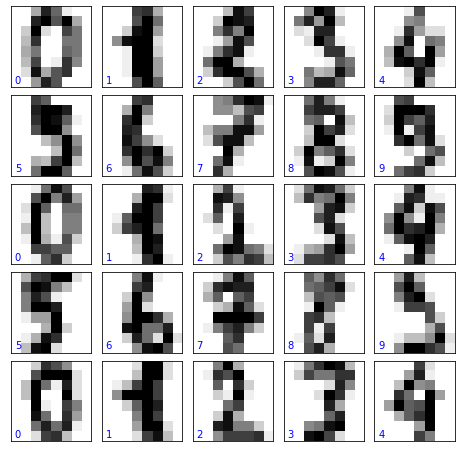

In [3]:
fig, axes = plt.subplots(5, 5, figsize=(8, 8),
# Subplot_kw Dict with keywords passed to the add_subplot call used to create each subplot. 
subplot_kw={'xticks':[], 'yticks':[]},
# The xticks() and yticks() function takes a list object as argument.
gridspec_kw=dict(hspace=0.1, wspace=0.1))
# gridSpec_kw Dict with keywords passed to the GridSpec constructor 
# used to create the grid the subplots are placed on

for i,ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap = 'binary')
    ax.text(0.05, 0.05, str(digits.target[i]),
    transform=ax.transAxes, color='blue')

In [4]:
# Transforming data to two dimensions using a method called ISOMAP
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_proj = iso.transform(digits.data)
data_proj.shape

(1797, 2)

In [5]:
X = digits.data
X.shape

(1797, 64)

In [6]:
y=digits.target
y.shape

(1797,)

In [7]:
# Splitting the training and testing data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=15)

In [8]:
# GaussianNB classifier is commonly used for text data...simple to use 
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [9]:
accuracy_score(y_test, y_pred)

0.8407407407407408

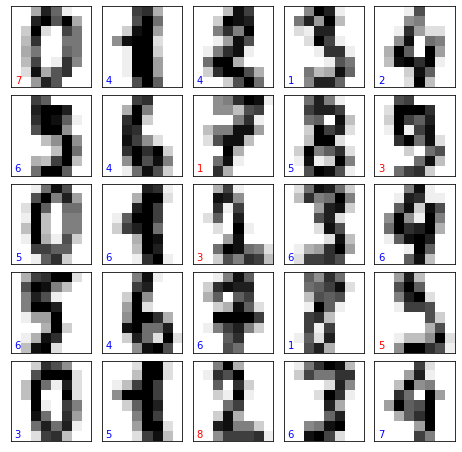

In [10]:
# With Predicted labels
fig, axes = plt.subplots(5, 5, figsize=(8, 8),
  subplot_kw={'xticks':[], 'yticks':[]},
 gridspec_kw=dict(hspace=0.1, wspace=0.1))  
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary')
    ax.text(0.05, 0.05, str(y_pred[i]),
    transform=ax.transAxes,
    color='blue' if (y_test[i] == y_pred[i]) else 'red')

    'Blue' color for correct Labels and 'Red' color for incorrect Labels.

* Commonly used text classification methods include decision trees, rule-based classifiers, SVM, and Bayesian classifiers.
* Text classification has important applications such as email classification and spam filtering; news filtering,
* Clustering Algorithms operate on features and differ in terms of the types of features extracted, transformations applied to the features for dimensionality reduction
